# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
data.loc[[4,3]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,22615,5410,7198,3915,1777,5185
3,13265,1196,4221,6404,507,1788


In [6]:
data.loc[[100,200,300]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [7]:
data['Detergents_Paper'] > 4767.854448

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10      True
11     False
12     False
13      True
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
410    False
411    False
412    False
413    False
414    False
415    False
416     True
417    False
418     True
419    False
420     True
421    False
422    False
423    False
424    False
425    False
426     True
427    False
428    False
429    False
430    False
431    False
432    False
433    False
434    False
435    False
436    False
437     True
438    False
439    False
Name: Detergents_Paper, dtype: bool

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [8]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12,421,426]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,17063,4847,9053,1031,3415,1784
2,13134,9347,14316,3141,5079,1894


In [9]:
samples.loc[samples['Grocery']>15000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [10]:
samples.where(samples['Grocery']>15000)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
samples.columns.tolist()

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [12]:
(samples.loc[samples['Grocery']>15000]).index

Int64Index([], dtype='int64')

In [13]:
print samples.index[samples['Fresh']>800].tolist()

[0, 1, 2]


In [14]:
print samples.index[samples['Fresh']>16000]

Int64Index([0, 1], dtype='int64')


In [15]:
samples['Fresh'] < 900

0    False
1    False
2    False
Name: Fresh, dtype: bool

In [16]:
print samples.index[(samples['Frozen'] >= 800) & (samples['Frozen'] <= 900)].tolist()

[]


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.277273
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


In [17]:
import seaborn as sns

ImportError: No module named seaborn

In [18]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,17063,4847,9053,1031,3415,1784
2,13134,9347,14316,3141,5079,1894


In [19]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

**Reviewer before you proceed to evaluate my answers, I have a request for you. I practise the MLND code on AWS through a hosted service provided by bitfusion and bitfusion does not have seaborn on their enviroment for me to import. I have said the same to my earlier reviewers who have reviewed my prior projects. I missed to mention this here. So could I please get a pass for not using seaborn. I will still try my best to answer without missing the gist of what I am trying to convey. **

* Sample 0 might be a Restaraunt Specializing in Dishes made out of fresh ingredients
    - If we look at the 'data' mean of customer spending on Fresh, Milk, Grocery and Delicatessen they are more than mean values and indeed more than 75 percentile mark. 
    - The Frozen spending for this smaple is less than 25 percentile mar.
    - This extreme difference between customer spending amounts on "Fresh, Milk, Grocery and Delicatessen" VS "Frozen" drives me to come to a conclusion that this customer or establishment is some one like a Restaraunt Specializing in Dishes made out of fresh ingredients


* Sample 1 might be a Super Market/Farmers Market
    - Except for Fresh and Frozen, remaining all(Milk, Grocery, Delicatessen, Detergents_paper) features have customer spending between 50 percentile Mark and the 75 percentile mark. 
    - Fresh is more that 75 percentile mark and Frozen is less than 50 percentile mark. This is a indication of a Framers market where Fresh is more and Frozen is less when compared to each other. So this removes the option of this establishment being a wholesale retailer. 
    - Here I am making an assumption that more monetary untis is corresponding to more quantity. Not just in this point but the whole data set.
    - Looking at customer spending on "Fresh" Vs "Frozen" and the point that remaining all fetures have spending in between 50 and 75 drives to a conclusion that this can be a Super Market or a Farmers Market.


* Sample 2 might be a Wholesale Retailer
    - Milk, Grocery, Detergents_Paper, and Delicatessen are above 75 percentile mark. Specifically if we look at Detergents_paper we notice that it is 2000 mu above the 75 percentile customer spending.
    - So here again in the case of sample 2 Fresh and Frozen should help me arrive at conclusion
    - Fresh and Frozen seem to be in between 50 and 75 percentile marks. This is also not helping me.
    - But i see that majority that is 4 out of 6 features are above 75 percentile mark and that Detergents-Paper spending drives me to a conclusion that this might be a wholsale retailers that we see in our lives.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [20]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis=1)
print new_data.head(5)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    data['Delicatessen'], 
                                                    test_size = 0.25, 
                                                    random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=2)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred) 
print score

   Fresh  Milk  Grocery  Frozen  Detergents_Paper
0  12669  9656     7561     214              2674
1   7057  9810     9568    1762              3293
2   6353  8808     7684    2405              3516
3  13265  1196     4221    6404               507
4  22615  5410     7198    3915              1777
-2.57909724348


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Which feature did you attempt to predict? 
    - let us look at the standard deviation to mean, the coefficient of variation(CV) for all the fetures 
        * Fresh -> 1.053917924
        * Milk -> 1.273298584
        * Grocery -> 1.195174373
        * Frozen -> 1.580332384
        * Detergents_Paper -> 1.654647138
        * Delicatessen -> 1.849406897
    - Out of all the features "Delicatessen" has high CV which means that the data for "Delicatessen" vaires largely when compared to the rest of the features. Which makes Delicatessen unpredictable using the rest of the features.
    - I will go with predicting "Delicatessen"


* What was the reported prediction score? 
    - For Delicatessen the r2_score = -2.57909724348
    

* Is this feature necessary for identifying customers' spending habits?
    - I have recevied a r2_score of -2.57909724348, prompting me to think that my reasoning is correct.
    - So Delicatessen is a needed feature to identify the establishments purchasing patterns.
   

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

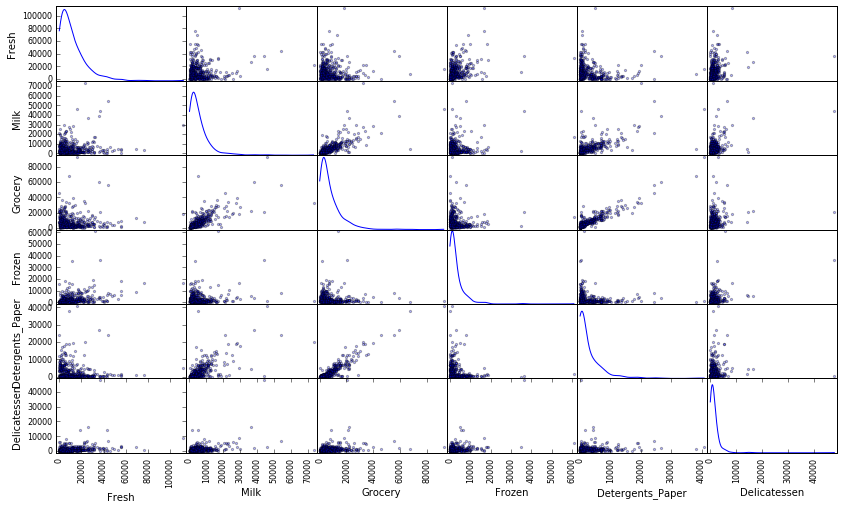

In [21]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
    - First thing I notice is the scales are too large, this makes the scatter plots to stick aournd the (0,0) point.The scales do not do proper justfication to the data at hand.
    - I do also notice that there are some data points at a higher value but those are less compared to the data points/samples that are closer to 0, looks like these are outliers.
    - The important thing that i missed in my first project submission is that I missed to mention the Skewness in the distribution of data. None of the data is fitting the pattern of "Normal Distribution"
    - https://en.wikipedia.org/wiki/Skewness
    - All of the distributions are +vely skewed. This confirms the above point graphically that most of the data points are in and around 0. So we need to perform data preprocessing to scale data values.


* Are there any pairs of features which exhibit some degree of correlation? 
    - Yes like I have discussed in the prior question. I see coorelation between
        - Milk and Grocery
        - Milk and Detergent Paper
        - Grocery and Detergent Paper
        - All of the above might fit the linear function y=mx+c
    - The correlation is visible in the graph, it is more evident/visible in the Grocery and Detergent Paper.


* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
    - It confimrs my suspicion that "Delicatessen" is hard to predict from the rest of the features. 
    - If we look at the scatter plot there is no coorelation to the any of the other features.
    - This makes it more relevant for classifying the samples.


* How is the data for those features distributed?
    - There is no correlation of "Delicatessen" to rest of the features.
    - It is also noticed that Frozen is not correlated to any of the other features.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

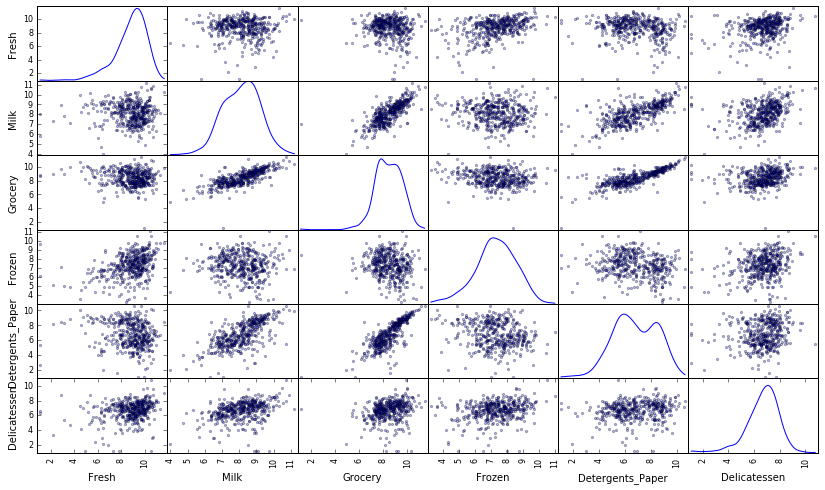

In [22]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [23]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613
2,9.482960,9.142811,9.569133,8.052296,8.532870,7.546446


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [24]:
np.percentile(log_data['Grocery'], 25.)

7.6746162013730803

In [25]:
log_data.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [26]:
# URL to understand difference between loc and iloc - https://pandas.pydata.org/pandas-docs/stable/indexing.html
outliers = []
good_data = pd.DataFrame()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print Q1-step, Q3+step
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend(log_data.index[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].tolist())
    print outliers
        
# OPTIONAL: Select the indices for data points you wish to remove
# outliers  = log_data.loc[]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
5.51455083361 12.2705718166


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Data points considered outliers for the feature 'Milk':
5.01673296722 11.1987283614


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356]
Data points considered outliers for the feature 'Grocery':
5.27575998758 11.672709891


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154]
Data points considered outliers for the feature 'Frozen':
4.26035024816 10.5252235842


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Data points considered outliers for the feature 'Detergents_Paper':
1.45874266385 12.3636993597


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161]
Data points considered outliers for the feature 'Delicatessen':
3.76959400251 9.74900908097


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


In [27]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


In [28]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


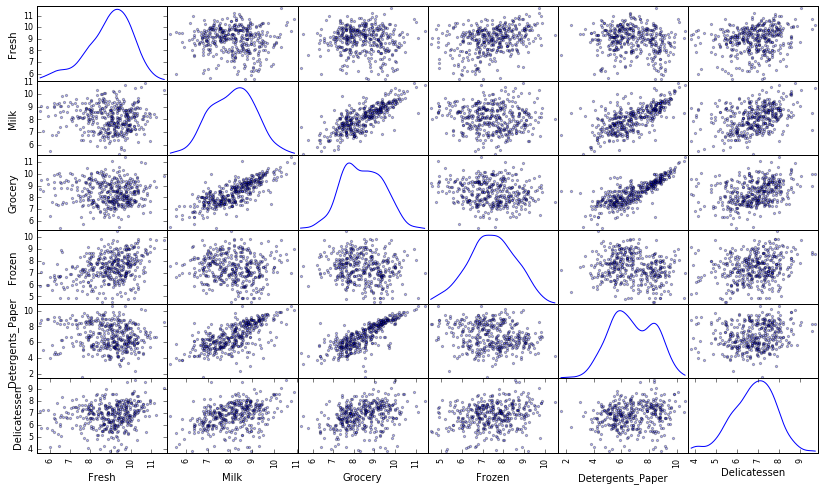

In [29]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Are there any data points considered outliers for more than one feature based on the definition above? 
    - Yes there, data point 65(Fresh, Froze), 66(Fresh, Delicatessen), 75(Grocery, Detergents_paper), 128 (Fresh, Deli), and 154 (Milk, Grocery, Delicatessen)


* Should these data points be removed from the dataset? 
    - Yes they are below the 1.5*IQR
    - Prior reviewer comment - It looks here like in each iteration through the features, the outliers for each feature are kept in the outliers list, this would mean that all observations that are deemed outliers for at least one feature is what is contained in outliers which would imply all 48 observations are being removed instead of the 5 for outliers for more than one feature, if this is your intention, then it should be stated in the discussion.
    - Yes, my intention was to remove all data points that I have collected in outliers list. I wanted the data for each feature to be normally distributed as close as possible.
    - If I were to remove the data points that have more that one feature in the outlier I am afraid that I will not be able to arrive at normal ditribution for all features. Normal distribution might be only for some features.
    - One 2nd thought let try removing only the 5 data points and see how the distributions are.
    - Please see the plot below, I have tried it and notice that Fresh is still -vely skewed when compared to removing 48 ouliers. Overall there is no huge change in distribution of data, but if we look at the plot where we romove 48 outliers is better that the distrubutions where we rmoved ony 5.
    



* If any data points were added to the `outliers` list to be removed, explain why.
    - For clustering purpose we will have to remove the outliers to maximize the distance between centers of each cluster and to minimize the mean distance form the center of cluster to the data points within the cluster.
    - Removing the Outliers makes it easier to identify the cebtroids of clusters in K-Means clustering easier.
    - https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
    - Outliers impact the mean, std, and various other statistics functions. And we happen to use these functions in our algorithms. These outliers should not impact the underlying generalization of function/data. Removing these outliers will help in deriving at regression or clustering models more efficiently.
    - Removal of outliers also brings the data closer to normal distribution
    

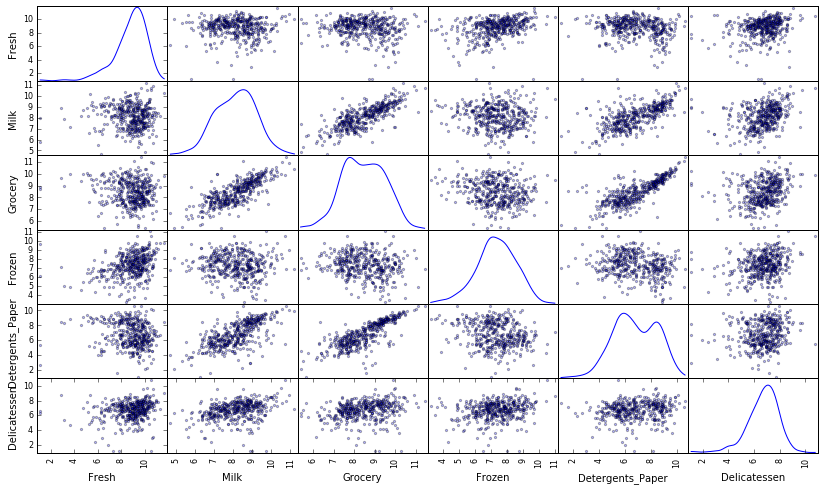

In [30]:
# dropping only the 5 features to see the distribution of data
good_data_drop_5 = log_data.drop([65, 66, 75, 128, 154]).reset_index(drop = True)
pd.scatter_matrix(good_data_drop_5, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

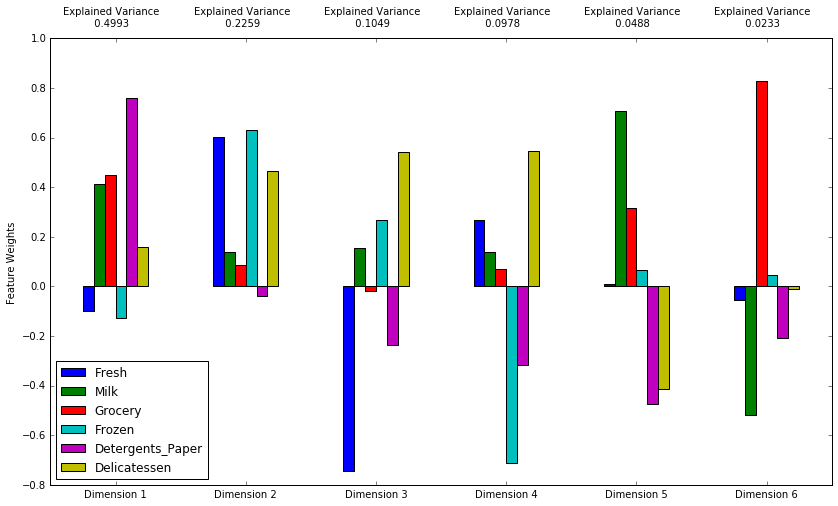

In [31]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6,whiten=True).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [32]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


In [33]:
pca_results.cumsum()

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.7252,0.5032,0.5479,0.5363,0.5020,0.7219,0.6213
Dimension 3,0.8301,-0.2420,0.7023,0.5159,0.7690,0.4870,1.1635
Dimension 4,0.9279,0.0247,0.8398,0.5869,0.0557,0.1713,1.7080
Dimension 5,0.9767,0.0361,1.5481,0.9037,0.1228,-0.3016,1.2960
Dimension 6,1.0000,-0.0182,1.0304,1.7304,0.1699,-0.5096,1.2866


**Answer:**

* How much variance in the data is explained* **in total** *by the first and second principal component? 
    - 0.7252 is the total variance explained by the first and second principal component
    - https://strata.uga.edu/software/pdf/pcaTutorial.pdf


* How much variance in the data is explained by the first four principal components? 
    - 0.9279 is the total variance explained by the first four principal components
    
    
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.
    - Variance in good_data vs representation in each Dimension
        - If we notice the decreasing order of variance for features, it will look like this 
            - Detergents_Paper
            - Frozen
            - Fresh
            - Delicatessen
            - Grocery
            - Milk.
        - I would expect the Dimensions to represent features in the same order to certain extent.
        - As expected Dimension 1 has Detergents_Paper with more magnitude of weight irrespective of the sign, Dimension 1 represents customer spending on Detergent_Paper to a major extent. Dimension 1 also represents Milk and Grocery. There are the three features that are correlated.
        - Dimension 2 - Represents more of Frozen, Fresh, and Delicatessen customer spending, again when we look at the magnitude of weights irrespective of the sign
        - Dimension 3 - Fresh (-ve weight magnitude) and Delicatessen.
        - Dimension 4 - Delicatessen and Frozen
        - Dimension 5 - Milk, Detergent_Paper and Delicatessen.
        - Dimension 6 - Grocery and Milk
        - https://onlinecourses.science.psu.edu/stat505/node/54



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [34]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1656,0.3645,-1.1473,2.3090,-0.1049,-0.8309
1,0.7801,0.4071,-0.6885,0.6850,-0.7369,0.0670
2,1.1115,0.9114,-0.1237,-0.2467,0.0059,0.1182


In [35]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613
2,9.482960,9.142811,9.569133,8.052296,8.532870,7.546446


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [36]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, whiten=True).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [37]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1656,0.3645
1,0.7801,0.4071
2,1.1115,0.9114


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

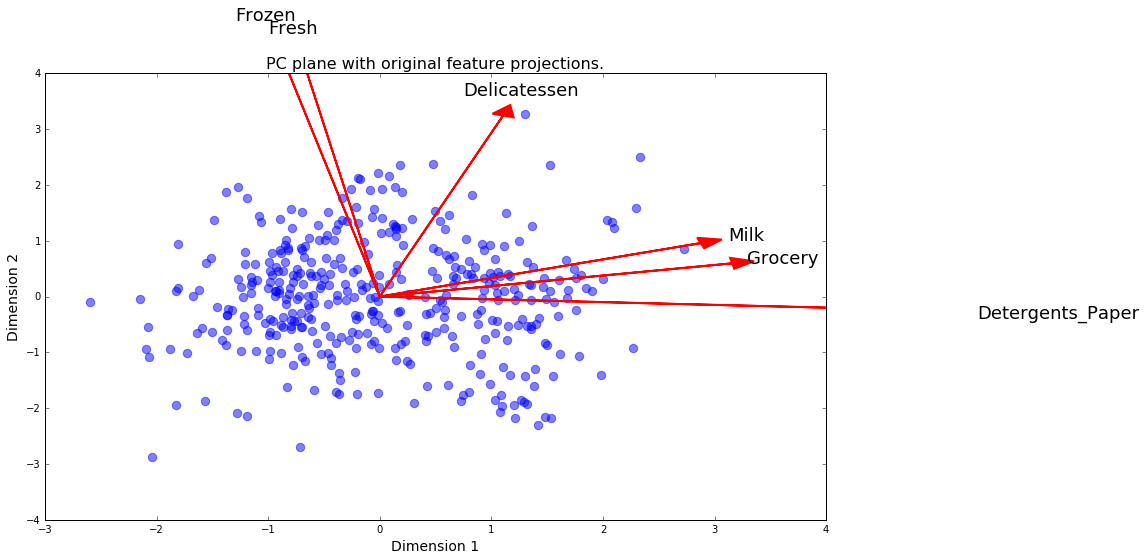

In [38]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [39]:
pca.explained_variance_ratio_

array([ 0.49930484,  0.22594807])

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? 
    - With the first component Detergents_paper, Milk, and Grocery are strogly coorelated. This is as expected from our scatter plot analysis.
    - I am little surprised that pca_results dimension 5(Milk) and 6(Grocery) are combined wiht the current Dimension 1
    
What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?
    - The pca results obtained when considering 6 dimensions are following
        Dimension 2 - Represents more of Frozen and Fresh customer spending
        Dimension 3 - Fresh (-ve weight magnitude) and Delicatessen
        Dimension 4 - Delicatessen and Frozen
    - These match wiht the current Dimension 2 which combines Frozen, Fresh, and Delicatessen
    - I would say that current Dimension 2 agrees wiht prior Dimension 2 + 4.
    - I am not surprised here.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* What are the advantages to using a K-Means clustering algorithm? 
    - It is simple in nature, easy to build and execute the algorithm.
    - Because of simple in nature it is one of the faster clustering algorithms.
    - Reference
          - http://scikit-learn.org/stable/modules/clustering.html#k-means
          - http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    - There is one major disadvantage for k means - Clusters are highly dependent on the initialization of the centroids. Local minimum.
        
        
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
    - Reference
        - https://www.mathworks.com/help/stats/clustering-using-gaussian-mixture-models.html?s_tid=gn_loc_drop
    - GMM clustering is more flexible because you can view it as soft clustering method. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster. 
    
    
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
    - The strong correlation shown in the scatter plots for Milk, Grocery, and Detergents_paper forces me to take K-means clustering, but at the same time the local minimum disadvantage, and the idea of choosing the intial cetroids prevents me from using k-means clustering.
    - Out of the 6 features we are able to see correlation for 3 for the remaining 3 the correltion is not shown explicitly out side. This is kind of 50-50 bewteen k-means and GMM clustering.
    - I would take my chances on GMM clustering

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.

- Assign the silhouette score to `score` and print the result.

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for k in range(2,7):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print k, score

2 0.318385457499
3 0.347013779721
4 0.310107585529
5 0.33636334295
6 0.309854387533


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* Report the silhouette score for several cluster numbers you tried. 
    - Number of Clusters   - Score
    -   2                  Socre is 0.318385457499
    -   3                  Socre is 0.347013779721
    -   4                  Socre is 0.310107585529
    -   5                  Socre is 0.33636334295
    -   6                  Socre is 0.309854387533


* Of these, which number of clusters has the best silhouette score?
    - The score is highest for 3 Clusters
    - Prior reviewer comments - Although 3 is acceptable as a correct number of clusters, 2 would have been even more optimal, it's possible this is because of the too many outliers removed. I'll suggest only removing the observations deemed outliers for more than one feature.
    - I would stick to removing all the 48 outliers rather than just the 5, because a normally distributed data will help us in generalizing the model in a better way.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

learn about global variables
https://docs.python.org/3/faq/programming.html

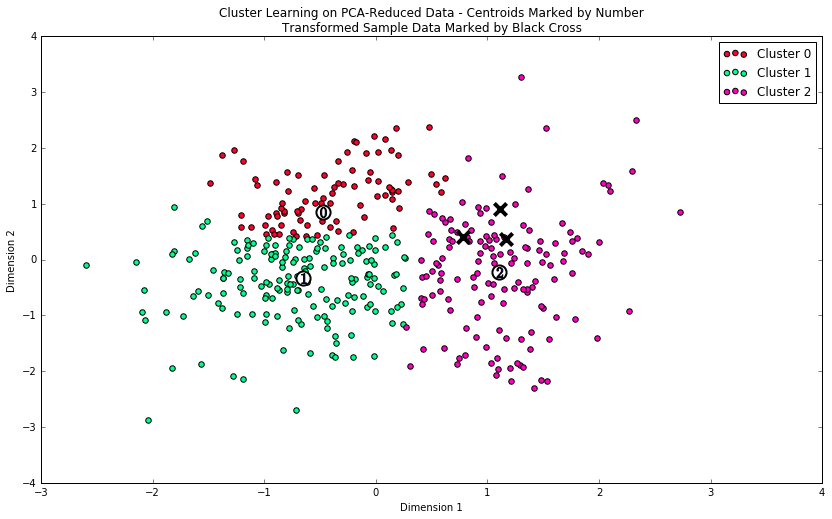

In [41]:
clusterer = GaussianMixture(n_components=3, random_state=0)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [42]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers, 2)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,16707.0,2671.0,3260.0,3953.0,413.0,1325.0
Segment 1,6573.0,1841.0,2407.0,1500.0,332.0,592.0
Segment 2,5071.0,8098.0,12122.0,1043.0,4913.0,1111.0


In [43]:
true_centers.loc['Segment 0']-((np.exp(good_data)).describe()).loc['50%']

Fresh               7599.0
Milk                -940.5
Grocery            -1313.0
Frozen              2223.5
Detergents_Paper    -375.0
Delicatessen         327.5
dtype: float64

In [44]:
true_centers.loc['Segment 1']-((np.exp(good_data)).describe()).loc['mean']

Fresh              -5857.630653
Milk               -3645.314070
Grocery            -5097.907035
Frozen             -1528.809045
Detergents_Paper   -2393.376884
Delicatessen        -862.716080
dtype: float64

In [45]:
true_centers.loc['Segment 2']-((np.exp(good_data)).describe()).loc['mean']

Fresh              -7359.630653
Milk                2611.685930
Grocery             4617.092965
Frozen             -1985.809045
Detergents_Paper    2187.623116
Delicatessen        -343.716080
dtype: float64

In [46]:
(np.exp(good_data)).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

**Reviewer before you proceed to evaluate my answers, I have a request for you. I practise the MLND code on AWS through a hosted service provided by bitfusion and bitfusion does not have seaborn on their enviroment for me to import. I have said the same to my earlier reviewers who have reviewed my prior projects. I missed to mention this here. So could I please get a pass for not using seaborn. I will still try my best to answer without missing the gist of what I am trying to convey. **

* Segment 0 might be an entity which is more of a Restaurant and less of a super markey, somthing in between like a cafe serving fresh sandwiches and ice creams, drinks. 
    - If we look at the 'good data' mean of customer spending on Fresh and Frozen they are more than mean values and slighthly closer to 75 percentile mark ignoring the -ve magnitude on the Fresh.
    - The Frozen spending is kind of throwing me off from making a conslcuison that this segment might represent establishments such as Restaraunt from making dishes out of fresh ingredinets.
    - If I were to look at the remaining features they seem to have spending that is less than mean and less than 50 percentile mark. Ignoring the -ve sign i notice that the values are slightly closer to 50 percentie mark.
    - I would come to a conclusion that this establishment might be an entity that more like a restaurant and less of a super market.


* Segment 1 might be a Mini Mart
    - for this segment all the values are less that means and 50 percentile mark of the good data. The means of this segment 1 are in between 25 and 50 percentile but a bit closer to 50 percentile mark.
    - It is hard to classify this segment, i would classify this as a mini mart something like a neighbourhood grocery store.


* Segment 2 might be more of Super Market and less of Wholesale retailer
    - Milk, Grocery, and Detergents_Paper are above mean and 75 percentile mark of good_data
    - Although Fresh, Frozen and Delicatessen are less than mean and 50 percentile mark, i also notice that they are above 25 percentile mark.
    - Based on the spending on Milk, Grocery, and Detergents_Paper I would say the establishment is like a wholesale retailer, but if we look at the Fresh and Frozen it is like a super market.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [47]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 2


In [48]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,16707.0,2671.0,3260.0,3953.0,413.0,1325.0
Segment 1,6573.0,1841.0,2407.0,1500.0,332.0,592.0
Segment 2,5071.0,8098.0,12122.0,1043.0,4913.0,1111.0


In [49]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,17063,4847,9053,1031,3415,1784
2,13134,9347,14316,3141,5079,1894


**Answer:**
 
- Let me start with Sample 2, that being classifed as wholesale retailer makes sense to me.
- I am really not sure why sample 0 and sample 1 are classified as Cluster 2, especially sample 1 where it is claerly indicated the customer spending for Fresh is higher which to me is not an indicator for Restaurant Specialising in Dishes made out of fresh ingredients. 

In [50]:
np.transpose(samples) # 6X2

,0,1,2
Fresh,31714,17063,13134
Milk,12319,4847,9347
Grocery,11757,9053,14316
Frozen,287,1031,3141
Detergents_Paper,3881,3415,5079
Delicatessen,2931,1784,1894


In [51]:
pca.components_ # 2X6

array([[-0.09758688,  0.41085006,  0.45111781, -0.12804262,  0.75951245,
         0.15785331],
       [ 0.60077834,  0.1369893 ,  0.08516261,  0.62996118, -0.03761194,
         0.46344461]])

In [52]:
np.transpose(pca_samples) # 2X3

array([[ 1.16560395,  0.78009843,  1.11145494],
       [ 0.36452196,  0.40705503,  0.91137407]])

In [53]:
pca_samples # 3X2

array([[ 1.16560395,  0.36452196],
       [ 0.78009843,  0.40705503],
       [ 1.11145494,  0.91137407]])

In [54]:
pca.explained_variance_ratio_

array([ 0.49930484,  0.22594807])

In [55]:
np.matmul(pca.components_, np.transpose(samples))

array([[ 10643.77144607,   7153.56828712,  12771.06808759],
       [ 23135.09534298,  13033.87544359,  13055.69076403]])

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

- From each of the 3 clusters randomly pick customers and change the delivery service from 5 days a week to 3 days a week. 
- Collect the Feedback from these randomly picked customers from each segment.
- Based on the feedback we can determine which customer clusters will be +vely or -vely affected

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- Like stated in the question we have done clustering on the unclassified data, by using unsupervised learning algorithms.
- Now we have arrived at labled data.
- Using this labled data we can employ supervised learning similar to the ones employed in "finding Donors" project, to determine which lable to assign for the new set of data
- So we have employed Unsupervised + Supervised learning algorithms here to classify new set of data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

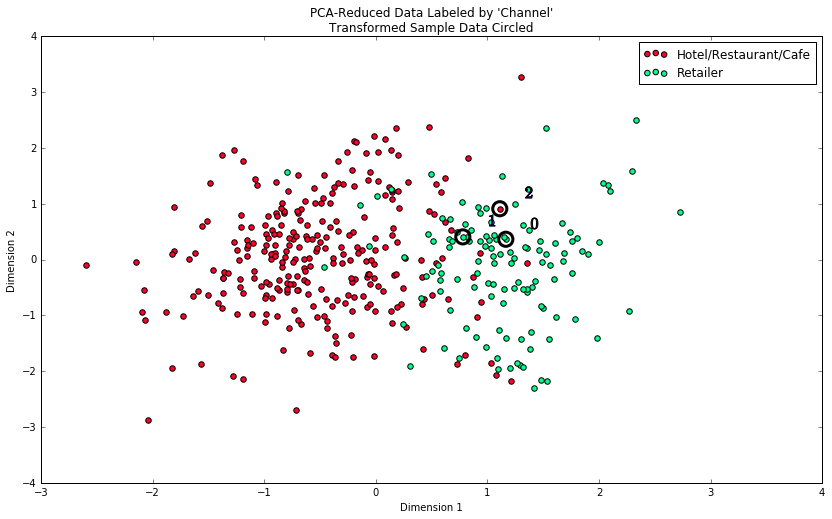

In [56]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

In [57]:
pca_samples

array([[ 1.16560395,  0.36452196],
       [ 0.78009843,  0.40705503],
       [ 1.11145494,  0.91137407]])

In [58]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,17063,4847,9053,1031,3415,1784
2,13134,9347,14316,3141,5079,1894


**Answer:**

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
    - I have selected 3 clusters, out of which the Cluster 2 from my clusters matches with Retailer cluster, it almost fits the same
    - The Cluster 0 and Cluster 1 has been merged into one cluster "Hotels/Restaurants/Cafes".
    - The clustering algorithm that I have done seems to be doing hard clustering where as the data shows to have some soft data points.


* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
    - Yes and No
    - Yes for pockets of data points that are away from the cetroids of the clusters
    - No becasue I see some overlapping in the clusters, if you were to say in terms of SVM there is not margin here. 

* Would you consider these classifications as consistent with your previous definition of the customer segments?
    - I have classified the segments as 
        - Segment 0 - Farmers Market, emphasis in Fresh, it can also be a Restaruant which markets itself as food prepared from Fresh ingredients
        - Segment 1 - Super Market, the values fall inbetween Farmers Market and Wholsale retailer.
        - Segment 2 - Wholesale Retailer, based on the customer spending on Milk, Grovery and Detergents_paper. These three are way above the means of the orginal data.
    - There are almost the same if I were to combine Segment 1 and Segment 2 as one segment and name it as retailer.
    - But I am still not convinced by the classification of smaple 0 as Retailer, I would still argue that this smaple shoudl be classifed as Restaurant when we look at the data. But both, GMM algorithm and as well as Channels classifed it as Retailer.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.